# Experiments while Development

## EDA target values

In [18]:
import torch

ts = torch.tensor([[ True,  True, False, False, False, False],
                    [ True, False, False,  False, False, False],
                    [ True, False,  True,  False, False, False]])

In [16]:
import torch
import torch.nn as nn

# Example of target with class indices and batches
loss = nn.CrossEntropyLoss()

# Batch size = 4, Number of classes = 5
batch_size = 16
num_classes = 4

# Input tensor with shape (batch_size, num_classes)
input = torch.randn(batch_size, num_classes, requires_grad=True)

# Target tensor with shape (batch_size), containing class indices
target = torch.empty(batch_size, dtype=torch.long).random_(5, num_classes + 5)

# Print input and target
print("Input:")
print(input)
print(input.shape)
print("Target:")
print(target - 5)
print(target.shape)

# Compute loss
output = loss(input, target - 5)
print("Loss:")
print(output)

# Backpropagation
output.backward()

Input:
tensor([[ 0.7717, -0.1763,  0.9028,  0.8445],
        [ 0.7986, -0.5804, -0.5129, -0.4744],
        [ 1.0585, -1.9281,  0.3278, -0.3773],
        [-0.5318,  0.5868, -0.1865,  0.8703],
        [ 0.2242,  0.5518, -1.4501,  0.1522],
        [-0.3322,  0.7536, -0.6175, -0.2876],
        [ 0.0395,  0.7777, -0.6003,  0.3503],
        [ 0.0386,  1.0383,  0.5565,  0.6400],
        [-0.9493, -0.9061,  1.9942, -0.9230],
        [ 0.2739, -0.0126, -0.8377,  0.6917],
        [ 0.7886,  0.5393,  0.6561, -0.7637],
        [ 0.6251, -0.0437,  0.7981, -1.6283],
        [ 0.1653, -0.1686, -0.9741, -0.0471],
        [ 0.7902, -1.6175,  0.2787, -2.4727],
        [ 0.1122, -0.9309, -0.6814,  0.5897],
        [-0.1944, -0.4859, -0.7062,  0.5397]], requires_grad=True)
torch.Size([16, 4])
Target:
tensor([0, 0, 3, 2, 0, 0, 2, 3, 0, 3, 1, 0, 0, 1, 0, 3])
torch.Size([16])
Loss:
tensor(1.5430, grad_fn=<NllLossBackward0>)


In [4]:
import pickle
import numpy as np

with open("../data/ptr_data.pkl", 'rb') as f:
    ordered_dict = pickle.load(f)

In [11]:
targets = [ordered_dict[key]["targets"] for key in list(ordered_dict.keys())]
targets_non_nan_len = [len(target[~np.isnan(target)]) for target in targets]

In [12]:
# mean len
np.mean(targets_non_nan_len)

20.13972869935278

In [14]:
sample_targets = ordered_dict[list(ordered_dict.keys())[25]]["targets"]
sample_targets[~np.isnan(sample_targets)]

array([4.363 , 3.26  , 4.16  , 4.83  , 4.368 , 4.341 , 3.841 , 4.67  ,
       5.133 , 4.325 , 4.093 , 4.559 , 3.793 , 3.875 , 4.122 , 4.202 ,
       4.621 , 4.331 , 4.491 , 5.326 , 3.819 , 3.823 , 3.9591, 3.984 ,
       4.152 , 3.799 , 3.5096])

## Sanity check of data loader

In [5]:
import os
import pandas as pd
import pickle
import torch

from knowledge_db import CODON_MAP_DNA
REVERSE_CODON_MAP_DNA = {v: k for k, v in CODON_MAP_DNA.items()}
REVERSE_CODON_MAP_DNA.update({0: ""})

In [4]:
rna_data = [
torch.tensor([12, 30, 50,  7, 51, 29, 32, 12, 62, 12, 10, 11, 49, 14,  1, 18, 57, 35,
        20, 62, 22, 51, 62, 22, 30, 43, 28,  8, 28, 47, 64, 51,  6, 47, 16,  8,
        12, 51, 47, 51,  7, 25, 62,  2,  8, 43, 21, 63, 46, 49, 47, 48, 32, 16,
        48, 46,  4,  6, 47, 49,  8, 49, 32, 44, 63, 48, 32, 43, 16, 49,  2, 21,
        51,  2, 11, 16,  2, 16, 31, 33, 10, 30, 17, 32, 52, 41, 47, 36,  1, 51,
        47, 33, 63,  6, 46, 39,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], device='cuda:1'),
torch.tensor([12, 22,  2,  6, 46, 21,  2, 26, 26, 23, 64, 25, 34, 51, 64,  6,  8, 58,
        43, 43, 25, 49, 27, 51, 31, 16,  8, 45, 64, 47, 62,  6, 62, 27, 61, 28,
         5, 36, 10, 31, 51, 22, 56,  8, 17, 54,  3, 48, 62, 17, 63,  3, 63,  2,
        19,  8, 50, 36, 24, 28,  9, 21,  3, 40, 33,  3, 18, 60, 49, 57, 21, 49,
        52,  7, 63, 51, 40,  4, 35, 13, 12, 16, 44, 32, 46,  1, 50, 50, 50, 19,
        46, 50, 23, 13, 31, 48, 50, 50, 51, 50, 49, 21, 48, 48, 48, 13, 50, 23,
         9, 27, 50,  1, 59,  1, 16, 23, 21, 48, 46, 19, 34,  4, 51, 33, 12,  2,
        27, 33, 12, 53, 50, 53, 43, 32,  4, 40, 25, 48, 23, 51, 48, 51, 48, 19,
        48, 49, 36, 48, 63, 50, 50, 35, 48, 16, 50, 33, 40, 50, 42, 63, 43, 64,
        49, 10, 23, 29,  1, 36, 28, 35, 50, 50, 63,  3, 18, 40,  7, 29, 33, 50,
        62, 42, 32, 29,  8, 51, 59,  3, 50, 63, 12,  5, 17, 43, 17, 16, 22, 22,
        43, 35, 44, 12, 31, 64, 14, 60, 29, 50, 48, 19, 11, 59, 48, 35, 50, 48,
        64, 12, 51, 16, 48, 28, 29, 25, 29, 13, 31, 63, 43,  1, 51, 48, 33, 48,
        13, 48, 41, 39,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], device='cuda:1'),
    
torch.tensor([12, 34, 34, 26, 47, 64, 22,  6, 54, 16, 60, 28, 42,  8, 64,  6, 26, 26,
         8,  8,  8,  8, 28, 12, 32,  4, 32, 63, 61, 20, 64, 28, 31, 20, 31, 50,
        33,  1, 49, 20, 14,  4, 61, 48, 30, 34, 17, 53, 41, 58, 32, 52, 43,  4,
        28, 36, 24,  4, 41, 28, 36, 23, 47, 50, 51, 51,  4, 36, 33, 52, 43, 59,
        61, 53, 60,  8,  1, 19,  9, 52, 43,  1, 16, 48, 48, 63,  9, 49,  3, 44,
        57, 27, 46,  4, 50, 52, 50, 17, 33, 52, 29, 50, 33, 35, 18, 42, 17, 48,
        51, 42, 35, 31, 53, 40,  5, 61, 53, 43, 44, 43,  8, 25,  2, 31, 50,  8,
        59, 42, 50, 42,  5, 12, 18,  8, 12, 25, 46, 12, 41,  7,  6,  1, 23,  7,
        27,  8, 16, 60, 19,  2, 54, 21, 49, 12, 12, 49, 18, 33, 43, 22,  2, 11,
        28, 17, 19, 54, 27,  1, 35,  5, 42, 32, 48, 49, 63, 46, 11, 13, 11,  2,
        43, 17, 47, 25, 50, 10, 43, 36, 33, 25, 40,  4, 51, 43, 51, 23, 29, 44,
         4, 59, 50, 19, 17,  7, 22, 46, 12, 18, 35,  8, 42, 12, 59, 44, 19, 42,
        34, 41, 60, 44,  1,  5, 50, 48, 63, 50, 21, 48, 62,  1,  3, 59, 53,  6,
        17,  5, 45, 17, 64, 54,  9,  3, 27, 29, 27,  5, 14,  6, 20, 16, 12, 15,
         4,  5, 54,  9, 52, 52, 33, 27, 13, 31, 29, 31, 16, 51, 43, 35, 13, 24,
        17, 51, 47,  8, 21, 10, 35, 61, 49,  4, 51,  1, 12, 44, 50, 42, 47,  7,
        45, 59, 35, 25, 31, 17, 17,  5, 16, 13, 13, 59, 17, 46, 27, 50, 48, 40,
        50, 50, 33, 64, 23,  7, 23, 29, 46, 16, 44,  5, 31, 40, 17, 50,  9, 37,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], device='cuda:1'),
    torch.tensor([12, 20,  2, 59,  1, 62, 42, 40,  6, 10, 47, 24, 17, 15, 16,  1,  6, 46,
        29, 50,  8, 18,  2, 31,  5, 16, 44, 60, 46, 23, 16, 15, 25, 63, 40, 14,
         5, 16, 53, 26,  8, 58, 25, 16, 51, 56,  2, 40, 49,  8, 55, 23, 48, 50,
        16, 32, 48,  4,  1, 43, 30, 28, 43, 59, 14, 64, 29, 16, 16, 50, 46, 40,
         2, 40, 64, 28, 17,  6, 28,  1, 18, 12, 43, 48, 62, 24, 50, 32, 63, 43,
        27, 16, 47, 41, 13, 41, 14, 40, 13,  5, 24, 60, 47, 31, 63, 49,  1, 41,
        60, 44, 49, 22, 10, 35, 51, 51,  6, 43, 46, 40, 49, 47, 51, 49,  1, 23,
        32, 17, 54, 59, 19, 51, 51, 50, 12, 33, 33, 50, 32, 33, 31,  8, 58, 14,
        36,  1, 43, 39,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], device='cuda:1'),
    torch.tensor([12, 17, 31,  8, 30, 23, 26, 28, 48, 12, 25, 28, 24, 28, 27, 49, 47, 10,
        29, 43, 31, 32, 12, 51, 28, 10, 36,  5, 53, 46,  2, 57, 16, 18, 12, 48,
        63, 50, 54,  6, 53,  8, 57, 51,  8, 48, 49, 10, 19,  5, 29, 23, 49, 25,
        51, 23, 28, 40, 50, 48, 23, 44, 35,  6, 12, 31, 44, 50, 56, 12, 45,  6,
        12, 45, 12, 32, 47,  8, 21, 10, 47, 62,  4,  9, 50, 19, 31,  8, 45,  8,
        64, 60, 27,  5, 49, 17, 49, 35, 33, 23,  6, 43, 42,  2,  1, 16, 16, 12,
        51, 41, 52,  8, 46, 40, 62,  4, 46, 31, 46, 46, 27,  1,  6, 63, 42, 44,
        46, 18,  2, 54, 64, 23,  7, 50,  8, 15, 50, 47,  5, 13, 25, 50, 32, 33,
        51, 11, 29, 33, 21, 13, 46, 48,  5, 25, 63,  5, 47, 29, 25, 15, 61, 59,
        63, 59, 32, 54,  5, 55,  4, 33,  3, 12, 42, 47, 46,  5, 19, 50, 35, 12,
        46, 31,  4, 10, 44, 47, 46, 50,  5,  6, 21, 50,  2, 36, 50, 24, 44, 32,
         6, 12, 12, 50, 50, 50, 63, 32, 11,  9, 31, 61,  8,  4, 16, 61,  8, 44,
        14,  9, 48, 32, 44,  2, 52, 12, 46, 63, 50, 49,  4, 49, 17, 43, 13, 63,
        13, 11, 48,  1, 19, 12, 35,  6, 47, 49, 64, 45, 22, 21, 46, 61, 27, 50,
        63, 49, 61, 43,  9, 27, 33,  9,  8, 49, 43, 47, 45, 35, 15, 50, 50,  8,
        45, 59, 40,  4, 44, 31, 27, 15, 45, 45,  5, 43, 33, 46, 15, 48, 33,  3,
        50, 46, 18, 45, 27, 46,  8, 29, 51, 51,  5, 33, 13, 33, 45, 45, 60, 10,
         9, 28,  3, 42, 50, 50, 12, 50, 57, 13, 46, 51, 50, 21, 18, 36, 11,  8,
        50, 18, 44, 58, 47, 61, 24, 47, 42, 49, 59, 27, 33, 50, 64, 42, 33,  7,
        21, 50, 33, 59, 47, 40,  3, 46, 50, 51, 29, 42,  3, 57,  4, 48, 13, 51,
        46, 50,  8, 51, 12, 43, 10, 22, 12, 60, 43, 51, 12, 50,  4, 31, 12, 47,
        12,  8, 51, 47, 48, 14, 52, 51, 47, 43, 48, 32,  8, 15, 17,  5, 58, 43,
        43,  8, 48, 49,  6, 59, 31,  6, 47, 40, 50,  5, 32,  1, 47,  8, 43, 21,
        19, 49,  3, 63, 15, 46, 43, 46, 21, 50,  7, 45, 21, 56,  4, 50, 51, 47,
        27, 44, 43, 12, 31, 31, 28,  9, 46, 42,  5, 50, 42, 59,  4, 56, 43, 31,
        51, 57, 22, 56, 42, 17, 31, 51,  4, 49, 45, 58,  6,  2, 46, 43, 49,  1,
        63, 49, 47, 10, 45, 21,  8, 43,  8, 50, 14, 51, 51,  6, 28, 60, 43, 58,
        45, 43,  5, 51,  3, 50,  7, 46, 43, 50, 46, 50, 59, 59,  3, 42, 45, 49,
        60, 22, 10, 25, 63, 60, 61, 18, 43, 47, 19, 50, 18, 47, 12, 48, 64, 47,
        41, 46, 12, 42, 51, 50, 44, 13, 46,  7, 46, 47, 24,  8, 50, 50, 22, 41,
        60,  8, 42, 24, 41, 23, 12, 48, 50, 43, 48, 43,  8,  8,  6, 17, 50, 47,
        25, 43,  4, 52, 43,  7, 53, 43, 50, 49, 62, 22,  7, 29, 47, 44, 16, 52,
        47, 45, 53, 22, 63, 28,  2, 52, 48, 32, 52, 19, 29, 44, 50,  8, 23,  5,
        23, 19, 21, 10, 47,  5, 51, 57, 13, 53, 44, 24, 52, 41, 47, 40,  8, 12,
        47, 42, 35, 17, 28, 22, 25, 19, 37,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], device='cuda:1')
    
]

In [108]:
torch.bincount(rna_data[2], minlength=65)[1:65]

tensor([ 8,  4,  3, 10,  9,  5,  5, 12,  5,  2,  3, 11,  5,  2,  1,  7, 13,  4,
         5,  4,  3,  3,  5,  2,  5,  3,  7,  6,  5,  1,  8,  4,  8,  4,  7,  4,
         1,  0,  0,  4,  4,  9, 10,  7,  2,  6,  5,  8,  6, 16,  8,  7,  5,  5,
         0,  0,  1,  1,  7,  4,  5,  1,  4,  5], device='cuda:1')

In [90]:
rna_data[0]

tensor([12, 30, 50,  7, 51, 29, 32, 12, 62, 12, 10, 11, 49, 14,  1, 18, 57, 35,
        20, 62, 22, 51, 62, 22, 30, 43, 28,  8, 28, 47, 64, 51,  6, 47, 16,  8,
        12, 51, 47, 51,  7, 25, 62,  2,  8, 43, 21, 63, 46, 49, 47, 48, 32, 16,
        48, 46,  4,  6, 47, 49,  8, 49, 32, 44, 63, 48, 32, 43, 16, 49,  2, 21,
        51,  2, 11, 16,  2, 16, 31, 33, 10, 30, 17, 32, 52, 41, 47, 36,  1, 51,
        47, 33, 63,  6, 46, 39,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0, 

In [50]:
rna_data_lists = [ls.tolist() for ls in rna_data]
rna_data_base = [''.join(REVERSE_CODON_MAP_DNA[codon] for codon in encoded_dna) for encoded_dna in rna_data_lists]

In [59]:
tissue_ids = torch.tensor([ 3, 26,  4, 23,  0, 25, 13, 16, 16,  4, 10, 28, 11,  5, 28, 24],
       device='cuda:1')
tissue_ids = tissue_ids.tolist()[:len(rna_data_base)]

In [60]:
seq_len = torch.tensor([ 96, 238, 324, 148, 621, 757, 857, 214, 343, 268, 481, 410, 307, 375,
        346, 350], device='cuda:1')
seq_len = seq_len.tolist()[:len(rna_data_base)]

In [61]:
targets = torch.tensor([6.5370, 5.0270, 2.7470, 5.9470, 5.4820, 5.4460, 4.2460, 4.9940, 4.8880,
        4.3590, 6.1870, 6.4934, 6.1070, 4.8720, 2.7996, 3.8572],
       device='cuda:1', dtype=torch.float64)
targets = targets.tolist()[:len(rna_data_base)]

#### Sanity check: Seq lengths

In [63]:
for seq, length in zip(rna_data_base, seq_len):
    print(len(seq), length*3)

288 288
714 714
972 972
444 444
1863 1863


#### Sanity check for targets

In [6]:
# Load ground truth data
ptr_data_path = "/export/share/krausef99dm/data/ptr_data/ptr_data.pkl"

# load pickle file
with open(os.path.join(ptr_data_path), 'rb') as f:
    raw_data = pickle.load(f)

In [88]:
for identifier, content in raw_data.items():
    #print(identifier)
    #print(content)

    sequence = content['fasta']
    bed_annotation = content['bed_annotation']

    coding_sequence = [nucleotide for nucleotide, annotation in zip(list(sequence), bed_annotation) if
                           annotation not in [5, 3]]
    coding_sequence_str = "".join(coding_sequence)

    for idx, test_sequence in enumerate(rna_data_base):
        if coding_sequence_str == test_sequence:
            target_test = targets[idx]
            tissue_id = tissue_ids[idx]
            target_true = content["targets"][tissue_id]
            print(identifier, target_test == target_true)
            print(target_test, target_true)
            
    #break

ENST00000528364
5.027 5.027
True
ENST00000492590
5.947 5.947
True
ENST00000381006
5.482 5.482
True
ENST00000296370
6.537 6.537
True
ENST00000234831
2.747 2.747
True


In [65]:
for seq, tissue_id, target in zip(rna_data_base, tissue_ids, targets):
    print(seq)
    print(tissue_id, "->", target)
    print("#####")

ATGACGGAACTAGAGACAGCCATGGGCATGATCATAGACGTCTTTTCCCGATATTCGGGCAGCGAGGGCAGCACGCAGACCCTGACCAAGGGGGAGCTCAAGGTGCTGATGGAGAAGGAGCTACCAGGCTTCCTGCAGAGTGGAAAAGACAAGGATGCCGTGGATAAATTGCTCAAGGACCTGGACGCCAATGGAGATGCCCAGGTGGACTTCAGTGAGTTCATAGTGTTCGTGGCTGCAATCACGTCTGCCTGTCACAAGTACTTTGAGAAGGCAGGACTCAAATGA
3 -> 6.537
#####
ATGAGCTTCCTCAAAAGTTTCCCGCCGCCTGGGCCAGCGGAGGGGCTCCTGCGGCAGCAGCCAGACACTGAGGCTGTGCTGAACGGGAAGGGCCTCGGCACTGGTACCCTTTACATCGCTGAGAGCCGCCTGTCTTGGTTAGATGGCTCTGGATTAGGATTCTCACTGGAATACCCCACCATTAGTTTACATGCATTATCCAGGGACCGAAGTGACTGTCTAGGAGAGCATTTGTATGTTATGGTGAATGCCAAATTTGAAGAAGAATCAAAAGAACCTGTTGCTGATGAAGAAGAGGAAGACAGTGATGATGATGTTGAACCTATTACTGAATTTAGATTTGTGCCTAGTGATAAATCAGCGTTGGAGGCAATGTTCACTGCAATGTGCGAATGCCAGGCCTTGCATCCAGATCCTGAGGATGAGGATTCAGATGACTACGATGGAGAAGAATATGATGTGGAAGCACATGAACAAGGACAGGGGGACATCCCTACATTTTACACCTATGAAGAAGGATTATCCCATCTAACAGCAGAAGGCCAAGCCACACTGGAGAGATTAGAAGGAATGCTTTCTCAGTCTGTGAGCAGCCAGTATAATATGGCTGGGGTCAGGACAGAAGATTCAATAAGAGATTATGAAGATGGGATGGAGGTGGATACCACACCAACAGTTGCTGGACAGTTTGAGG

## Sanity checks train data

In [13]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

### Sequences (ids) in train data check

In [14]:
indices_seq_train = pd.read_csv("/export/share/krausef99dm/data/data_train/train_9.0k_indices.csv")
indices_seq_val = pd.read_csv("/export/share/krausef99dm/data/data_test/val_9.0k_indices.csv")
indices_seq_test = pd.read_csv("/export/share/krausef99dm/data/data_test/test_9.0k_indices.csv")


indices_cod_train = pd.read_csv("/export/share/krausef99dm/data/data_train/codon_train_2.7k_indices.csv")
indices_cod_val = pd.read_csv("/export/share/krausef99dm/data/data_test/codon_val_2.7k_indices.csv")
indices_cod_test = pd.read_csv("/export/share/krausef99dm/data/data_test/codon_test_2.7k_indices.csv")

indices_seq = indices_seq_test
indices_cod = indices_cod_test

In [ ]:
# get all unique identifddiers
len

In [15]:
indices_seq_set = set(indices_seq.identifier.tolist())
indices_cod_set = set(indices_cod.identifier.tolist())

In [16]:
print(len(indices_seq_set))
print(len(indices_cod_set))

1350
1350


In [17]:
print("Total codon: ", len(indices_cod_set))  # max seq len 2700
print("Total seq:   ", len(indices_seq_set))  # max seq len 8100
print("")      
print("codon u seq: ", len(indices_cod_set | indices_seq_set)) # nr of seq contained in codon set OR seq set (union)
print("codon n seq: ", len(indices_cod_set & indices_seq_set)) # nr of seq contained in codon set AND seq set (union)
print("codon \ seq: ", len(indices_cod_set - indices_seq_set)) # nr of seq contained in codon set but NOT in seq set
print("seq \ codon: ", len(indices_seq_set - indices_cod_set)) # nr of seq contained in seq set but NOT in codon set

Total codon:  1350
Total seq:    1350

codon u seq:  1350
codon n seq:  1350
codon \ seq:  0
seq \ codon:  0


In [18]:
len(ordered_dict)

11279

In [19]:
# check sequence lengths
#seq_len_train_codon_set = [len(ordered_dict[idx]["fasta"]) for idx in list(set(indices_cod.identifier))]
seq_len_codon_set = [len(ordered_dict[idx]["fasta"]) for idx in list(indices_cod.identifier)]  # can also add set inside of list()

In [20]:
# Check all sequences in codon data
all_indices = np.concat([ls.identifier.tolist() for ls in [indices_cod_train, indices_cod_val, indices_cod_test]])
seq_len_codon_set = [len(ordered_dict[idx]["fasta"]) for idx in list(set(all_indices))]

In [21]:
print("len", len(seq_len_codon_set))
print("max", max(seq_len_codon_set))

len 9178
max 26829


In [22]:
# more than 8100 len
print(-sum([1 if x > 9000 else 0 for x in seq_len_codon_set]))
sum([1 if x <= 9000 else 0 for x in seq_len_codon_set])

-158


9020

In [ ]:
# SHOULD
# train: 124984
# val:   26909
# test:  26829

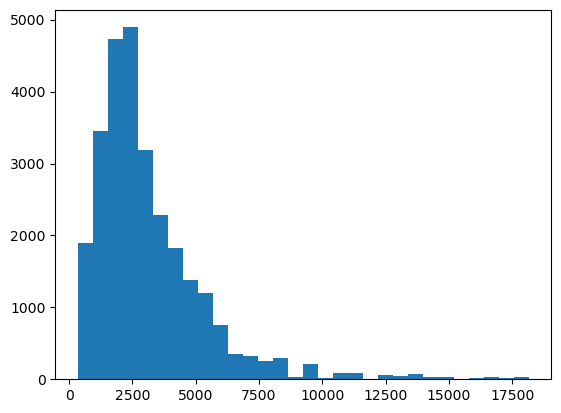

In [99]:
plt.hist(seq_len_codon_set, bins=30)
plt.show()

### Train data sanity checks

In [46]:
#with open("/export/share/krausef99dm/data/data_train/train_8.1k_data.pkl", 'rb') as f:
    #rna_data, target_ids, targets, targets_bin = pickle.load(f)

# Test data
with open("/export/share/krausef99dm/data/data_test/test_8.1k_data.pkl", 'rb') as f:
    rna_data, target_ids, targets, targets_bin = pickle.load(f)

In [67]:
len(rna_data)

31727

In [68]:
print(rna_data[0][0].unique())  # seq (#4)
print(rna_data[0][1].unique())  # coding area (#5)
print(rna_data[0][2].unique())  # sec struc (#3)
print(rna_data[0][3].unique())  # loop type (#7)

tensor([6, 7, 8, 9])
tensor([1, 2, 3, 4, 5])
tensor([10, 11, 12])
tensor([13, 14, 15, 16, 17, 18, 19])


In [69]:
np.histogram(targets)

(array([    3,   113,  1299,  5018,  9957, 10597,  4285,   423,    30,
            2]),
 array([0.9085 , 1.74525, 2.582  , 3.41875, 4.2555 , 5.09225, 5.929  ,
        6.76575, 7.6025 , 8.43925, 9.276  ]))

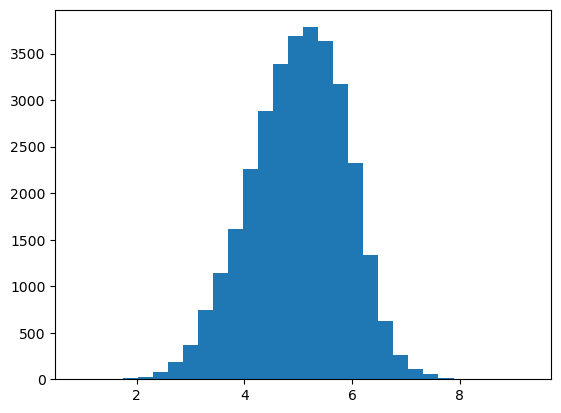

In [70]:
# Target distributions
plt.hist(targets, bins=30)
plt.show()

In [ ]:
34 x 741 x 24

In [42]:
len(rna_data[1000][0])

1491

In [71]:
# Extract lengths of sequences
lengths = [len(rna_data[i][0]) for i in range(len(rna_data))]

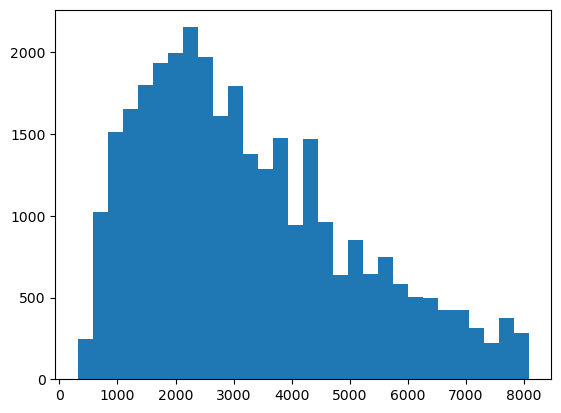

In [73]:
# Test
plt.hist(lengths, bins=30)
plt.show()

In [ ]:
# Train
plt.hist(lengths, bins=30)
plt.show()